# 파이썬과 라이브러리 2

## ex_0208.ipynb 내용 참고

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# 현재 작업 폴더
os.getcwd()

'c:\\Users\\Lagom\\lagom\\study-in-school\\BIG'

In [3]:
df0 = pd.read_csv('./data/data_iris.csv')

In [4]:
df0.shape

(150, 5)

In [5]:
# data 상단 3개
df0.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
# describe
np.round(df0.describe(), 2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
# Y = df0.iloc[:, 4]
# Y = df0.loc[:, "Species"]
# Y = df0['Species']
Y = df0.Species

df = df0.drop(columns='Species')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.count(axis=0)

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

In [10]:
type(df.count)

method

In [11]:
df.count(axis=0).values

array([150, 150, 150, 150], dtype=int64)

In [12]:
df.mean(axis=0)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [13]:
df.std(axis=0)

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [14]:
df["Sepal.Length"].mean()

5.843333333333334

In [15]:
df["Sepal.Length"].corr(df["Sepal.Width"])

-0.1175697841330021

In [16]:
# 상관계수
# 상관계수 행렬
np.round(df.corr(), 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000,-0.118,0.872,0.818
Sepal.Width,-0.118,1.000,-0.428,-0.366
Petal.Length,0.872,-0.428,1.000,0.963
Petal.Width,0.818,-0.366,0.963,1.000


In [17]:
# 상관계수 칼럼 하나
df.corrwith(df['Sepal.Length'])

Sepal.Length    1.000000
Sepal.Width    -0.117570
Petal.Length    0.871754
Petal.Width     0.817941
dtype: float64

### 상관계수

상관계수를 계산하는 방법

- **Pearson**, **Spearman**, **Kendall**

In [18]:
df0[df0.Species == 'versicolor'].mean()

Sepal.Length    5.936
Sepal.Width     2.770
Petal.Length    4.260
Petal.Width     1.326
dtype: float64

- Group by

In [19]:
df0.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [20]:
df.count()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

In [21]:
np.nan

nan

In [22]:
np.nan + 1

nan

In [23]:
np.nan * 100

nan

In [24]:
type(np.nan)

float

In [25]:
# 결측치 넣기

df.iloc[10, 0] = np.nan
df.iloc[32, 2] = np.nan
df.iloc[17, 2] = np.nan
df.iloc[129, 2] = np.nan

In [26]:
df.count()

Sepal.Length    149
Sepal.Width     150
Petal.Length    147
Petal.Width     150
dtype: int64

In [27]:
df.mean(axis=0)

df.mean(axis=0, skipna=True)

# 결측치 포함(skipna=False)
df.mean(axis=0, skipna=False)

Sepal.Length         NaN
Sepal.Width     3.057333
Petal.Length         NaN
Petal.Width     1.199333
dtype: float64

- 결측지가 있는데 없는것으로 오해 할 수 있으므로 skipna=False를 하면 좋다.

- 결측치가 있을때, 결측치를 무시하거나 고려하거나 할 수 있다.

In [28]:
# 결측치 확인
df.isnull()

# False는 0이 됨
df.isnull()*1

# 결측치 개수 확인하기
df.isnull().sum()

Sepal.Length    1
Sepal.Width     0
Petal.Length    3
Petal.Width     0
dtype: int64

In [29]:
df.shape[0] - df.count(axis=0)

Sepal.Length    1
Sepal.Width     0
Petal.Length    3
Petal.Width     0
dtype: int64

In [30]:
# 결측치의 비율 계산
df.isnull().mean(axis=0)

Sepal.Length    0.006667
Sepal.Width     0.000000
Petal.Length    0.020000
Petal.Width     0.000000
dtype: float64

- 결측치가 몇개 있는지 보다 결측치가 어느정도의 비율로 있는지 확인하는것이 중요하다.

### 결측치를 다루는 방법

1. 소거(제거)

    - 행이나 열을 없애는 방법밖에 없다.

    - 행이나 열 중 행을 제거하는 것이 더 쉬운 방법이다.

    - 케이스 바이 케이스로 상황에 따라서 행이나 열을 제거함 

2. 임의의 값을 넣기

- 세로 방향으로 데이터가 줄어듬

    - 행을 제거

- 가로 방향으로 데이터가 줄어듬

    - 열을 제거

In [31]:
# 결측치를 소거 하는 방법
# dropna()
# df.dropna(axis=0, inplace=True)

df2 = df.dropna(axis=0)

In [32]:
df2.shape

(146, 4)

In [33]:
# 결측치가 있는 행을 제거 하는데, 단, 정상이 3개 이하일때
df.dropna(axis=0, thresh=3)

# 결측치 있는 행 제거. 
# 최소 3개 이상 정상값이 있는 행은 제외.
df2 = df.dropna(axis=0, thresh = 3)
df2.shape

(150, 4)

In [34]:
# 결측치 있는 열 제거. 
df3 = df.dropna(axis=1)

In [35]:
df.count()

Sepal.Length    149
Sepal.Width     150
Petal.Length    147
Petal.Width     150
dtype: int64

In [36]:
# 결측치 있는 열 제거.
# 최소 148개 이상 정상값이 있는 열은 제외.
df3 = df.dropna(axis=1, thresh = 148)
df3.shape

(150, 3)

In [37]:
# 결측치를 채워넣는다.
# 전체에 적용.
df4 = df.fillna(value=0)
df4.count()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

In [38]:
# 결측치를 채워넣는다.
# 개개 열에 적용.
df['Sepal.Length'] = df['Sepal.Length'].fillna(value=df['Sepal.Length'].mean())
df['Petal.Length'] = df['Petal.Length'].fillna(value=df['Petal.Length'].mean())
df.count()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

## 시각화

### 산점도

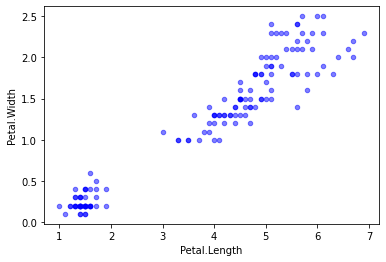

In [41]:
df0.plot.scatter(x='Petal.Length', y='Petal.Width',color='blue',alpha=0.5,marker='o',s=20)
plt.show()

### 히스토그램

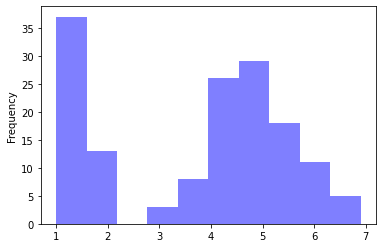

In [43]:
df0.loc[:,'Petal.Length'].plot.hist(color='blue',alpha=0.5)
plt.show()

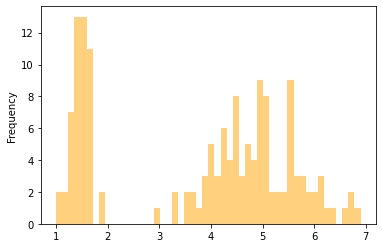

In [44]:
df0.loc[:,'Petal.Length'].plot.hist(bins=50,color='orange',alpha=0.5)
plt.show()

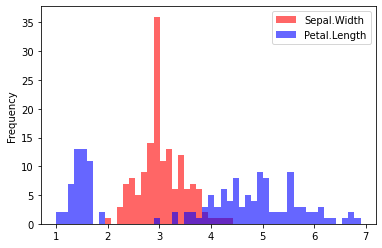

In [45]:
df0.loc[:,['Sepal.Width','Petal.Length']].plot.hist(bins=50,color=['red','blue'],alpha=0.6)
plt.show()

### 막대 그래프

In [46]:
Y.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [47]:
type(Y.value_counts())

pandas.core.series.Series

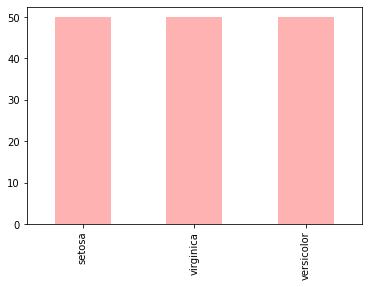

In [48]:
Y.value_counts().plot.bar(color='r', alpha=0.3)

In [49]:
sr = Y.value_counts()

df = pd.DataFrame(sr)

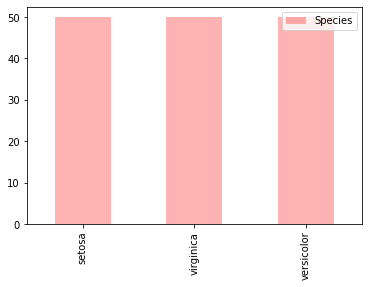

In [51]:
df.plot.bar(color='r', alpha=0.3)
plt.show()

### 산점도 행렬

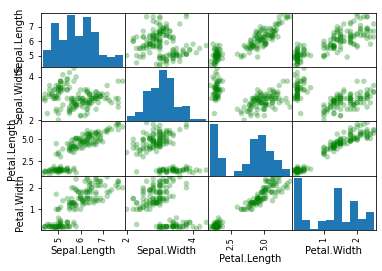

In [56]:
pd.plotting.scatter_matrix(df0, c='g', marker='o', s=30, alpha=0.3)
plt.show()

In [57]:
my_cols_dict = {'setosa':'red', 'virginica':'green', 'versicolor':'blue'}

In [59]:
my_cols = Y.apply(lambda x: my_cols_dict[x])
my_cols.value_counts()

red      50
green    50
blue     50
Name: Species, dtype: int64

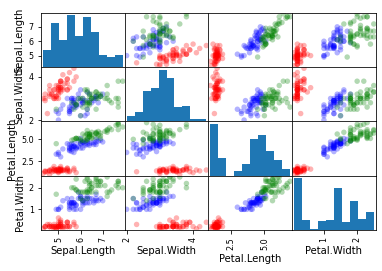

In [60]:
pd.plotting.scatter_matrix(df0, c=my_cols, marker='o', s=30, alpha=0.3)
plt.show()